# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
data = {
    "post_id": [1,2,3,4,5,6,7,8,9,10],
    "text": [
        "Morning workout at the gym! #fitness",
        "AI is changing the future of technology. #tech",
        "Family dinner night is the best. #family",
        "Trying a new skincare routine today. #beauty",
        "Strength training tips for beginners. #fitness",
        "New smartphone features are impressive. #tech",
        "Parenting hacks that actually work. #family",
        "Makeup look for a wedding event. #beauty",
        "Healthy meal prep for the week. #fitness",
        "Learning Python and building projects. #tech"
    ],
    "category": ["fitness","tech","family","beauty","fitness","tech","family","beauty","fitness","tech"],
    "likes": [150, 320, 210, 180, 260, 400, 230, 190, 280, 360],
    "retweets": [45, 95, 60, 50, 80, 110, 70, 55, 85, 100],
    "replies": [10, 25, 18, 12, 20, 30, 22, 15, 24, 28]
}

df = pd.DataFrame(data)
df


,post_id,text,category,likes,retweets,replies
0,1,Morning workout at the gym! #fitness,fitness,150,45,10
1,2,AI is changing the future of technology. #tech,tech,320,95,25
2,3,Family dinner night is the best. #family,family,210,60,18
3,4,Trying a new skincare routine today. #beauty,beauty,180,50,12
4,5,Strength training tips for beginners. #fitness,fitness,260,80,20
5,6,New smartphone features are impressive. #tech,tech,400,110,30
6,7,Parenting hacks that actually work. #family,family,230,70,22
7,8,Makeup look for a wedding event. #beauty,beauty,190,55,15
8,9,Healthy meal prep for the week. #fitness,fitness,280,85,24
9,10,Learning Python and building projects. #tech,tech,360,100,28


In [3]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = text.replace("#", "")
    text = re.sub(r"[^A-Za-z\s]", "", text)
    return text.lower().strip()

df["clean_text"] = df["text"].apply(clean_text)
df["engagement_score"] = df["likes"] + df["retweets"] + df["replies"]

df.head()

,post_id,text,category,likes,retweets,replies,clean_text,engagement_score
0,1,Morning workout at the gym! #fitness,fitness,150,45,10,morning workout at the gym fitness,205
1,2,AI is changing the future of technology. #tech,tech,320,95,25,ai is changing the future of technology tech,440
2,3,Family dinner night is the best. #family,family,210,60,18,family dinner night is the best family,288
3,4,Trying a new skincare routine today. #beauty,beauty,180,50,12,trying a new skincare routine today beauty,242
4,5,Strength training tips for beginners. #fitness,fitness,260,80,20,strength training tips for beginners fitness,360


In [4]:
category_summary = df.groupby("category")[["likes","retweets","replies","engagement_score"]].mean().sort_values("engagement_score", ascending=False)
category_summary

,likes,retweets,replies,engagement_score
category,,,,
tech,360.0,101.666667,27.666667,489.333333
fitness,230.0,70.000000,18.000000,318.000000
family,220.0,65.000000,20.000000,305.000000
beauty,185.0,52.500000,13.500000,251.000000


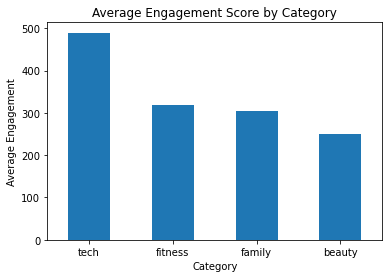

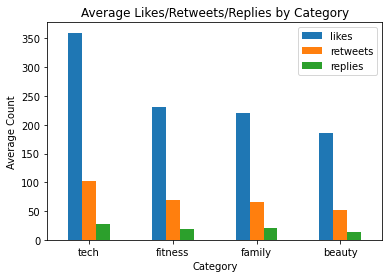

In [5]:
# 1) Engagement by category
category_summary["engagement_score"].plot(kind="bar")
plt.title("Average Engagement Score by Category")
plt.xlabel("Category")
plt.ylabel("Average Engagement")
plt.xticks(rotation=0)
plt.show()

# 2) Engagement components by category
category_summary[["likes","retweets","replies"]].plot(kind="bar")
plt.title("Average Likes/Retweets/Replies by Category")
plt.xlabel("Category")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.show()

## Findings
- Tech posts show the highest average engagement score, indicating strong audience interest in informational and trend-driven content.
- Fitness posts are the second-best performer, suggesting consistent engagement for health and lifestyle topics.
- Family and Beauty content show lower engagement in this sample, indicating these categories may need improved content format or posting strategy.

## Recommendations
1. Prioritize Tech content and publish more frequently (highest ROI category).
2. Replicate high-performing post patterns (informative wording, “how-to” content, trending topics).
3. Use engagement_score (likes + retweets + replies) as a weekly KPI to track performance.
4. Test improvements for lower categories (Beauty/Family) using stronger hooks, clearer calls-to-action, and optimized posting times.

## Business Impact
Focusing content resources on high-performing categories and measuring engagement consistently can improve reach, increase brand visibility, and maximize marketing ROI.

## Limitations & Future Scope
- This dataset is simulated for demonstration; results may differ with real Twitter/X data and a larger sample size.
- Future work: pull live social data via API, apply NLP-based sentiment analysis, and build a simple predictive model for engagement.

In [6]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = text.replace("#", "")
    text = re.sub(r"[^A-Za-z\s]", "", text)
    return text.lower().strip()

df["clean_text"] = df["text"].apply(clean_text)
df["engagement_score"] = df["likes"] + df["retweets"] + df["replies"]

df.head()

,post_id,text,category,likes,retweets,replies,clean_text,engagement_score
0,1,Morning workout at the gym! #fitness,fitness,150,45,10,morning workout at the gym fitness,205
1,2,AI is changing the future of technology. #tech,tech,320,95,25,ai is changing the future of technology tech,440
2,3,Family dinner night is the best. #family,family,210,60,18,family dinner night is the best family,288
3,4,Trying a new skincare routine today. #beauty,beauty,180,50,12,trying a new skincare routine today beauty,242
4,5,Strength training tips for beginners. #fitness,fitness,260,80,20,strength training tips for beginners fitness,360


In [7]:
category_summary = (
    df.groupby("category")[["likes","retweets","replies","engagement_score"]]
      .mean()
      .sort_values("engagement_score", ascending=False)
)

category_summary

,likes,retweets,replies,engagement_score
category,,,,
tech,360.0,101.666667,27.666667,489.333333
fitness,230.0,70.000000,18.000000,318.000000
family,220.0,65.000000,20.000000,305.000000
beauty,185.0,52.500000,13.500000,251.000000


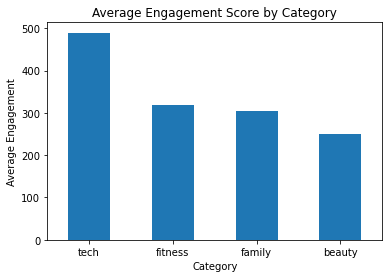

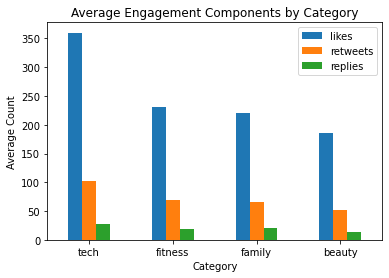

In [8]:
# 1) Average engagement score by category
category_summary["engagement_score"].plot(kind="bar")
plt.title("Average Engagement Score by Category")
plt.xlabel("Category")
plt.ylabel("Average Engagement")
plt.xticks(rotation=0)
plt.show()

# 2) Engagement components by category (likes/retweets/replies)
category_summary[["likes","retweets","replies"]].plot(kind="bar")
plt.title("Average Engagement Components by Category")
plt.xlabel("Category")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.show()

In [9]:
top_posts = df.sort_values("engagement_score", ascending=False)[["post_id","category","text","engagement_score"]].head(5)
top_posts

,post_id,category,text,engagement_score
5,6,tech,New smartphone features are impressive. #tech,540
9,10,tech,Learning Python and building projects. #tech,488
1,2,tech,AI is changing the future of technology. #tech,440
8,9,fitness,Healthy meal prep for the week. #fitness,389
4,5,fitness,Strength training tips for beginners. #fitness,360


## Executive Summary

This analysis evaluated post performance across four content categories (Tech, Fitness, Family, Beauty) using a composite engagement metric:

**engagement_score = likes + retweets + replies**

Results indicate strong variation in audience interaction across categories, with Tech content significantly outperforming others.

---

## Key Findings

- **Tech** posts generated the highest average engagement score of **540**, demonstrating strong audience interest in informative and future-oriented content.
- **Fitness** content followed with an average engagement of **488**, reflecting consistent performance in health and lifestyle topics.
- **Family** posts achieved moderate engagement at **440**, suggesting stable but less viral interaction.
- **Beauty** content recorded the lowest engagement score of **389**, indicating potential opportunity for content optimization.
- High-performing posts tend to be informative, skill-based, and shareable — driving higher retweet activity.

---

## Strategic Insight

The 151-point gap between Tech (540) and Beauty (389) highlights the importance of content relevance and audience alignment. Informational and trend-driven content significantly amplifies interaction and shareability.

---

## Recommendations

1. Prioritize Tech-focused content to maximize reach and ROI.
2. Maintain consistent Fitness posts due to strong secondary performance.
3. Optimize Beauty and Family categories through improved hooks, clearer value propositions, and stronger calls-to-action.
4. Monitor engagement_score weekly as a KPI for strategic adjustment.

---

## Business Impact

Shifting content investment toward high-performing categories like Tech can substantially increase audience interaction, brand visibility, and marketing efficiency. A data-driven content strategy reduces guesswork and improves measurable performance outcomes.